<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/Facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load libraries

In [7]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import prophet

In [23]:
from prophet import Prophet

##Load Data
A partir del data-set, se genera una regresión por defecto aditiva caracterizada por:

1. Tendencia lineal o logistica: el metodo dectecta la tendencia y puntos de cambios.
2. Componente estacional anual modelado a través una serie de fuller.
3. Componente estacional semanal que utiliza variables dummy
4. Lista opcional que proporciona el usuario de días importantes, admite una lista de información exogena sobre fechas vacacionales.

In [12]:
df = pd.read_csv('BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


##Format the Data

In [13]:
df.columns =['ds', 'y']

In [14]:
df['ds'] = pd.to_datetime(df['ds'])

In [25]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


##Create and Fit Model

In [24]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplr4kd0yi/513iwq84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplr4kd0yi/4okogqdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85237', 'data', 'file=/tmp/tmplr4kd0yi/513iwq84.json', 'init=/tmp/tmplr4kd0yi/4okogqdj.json', 'output', 'file=/tmp/tmplr4kd0yi/prophet_modelbf0qc766/prophet_model-20230621153307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#Pronosticos del futuro

#Paso 1: Crear el dataframe donde colocaremos los resultados.

In [26]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [27]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [28]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [29]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [30]:
future.tail()  ##Empieza en el pasado termina en el futuro

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


##Paso 2: Calcular los pronosticos y guardarlos en future

In [31]:
forecast = m.predict(future)

In [32]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1777.567610,1154.435584,1480.533763,1777.567610,1777.567610,-461.891431,-461.891431,-461.891431,-461.891431,-461.891431,-461.891431,0.0,0.0,0.0,1315.676179
1,1992-02-01,1780.153059,1188.469913,1504.171244,1780.153059,1780.153059,-427.359036,-427.359036,-427.359036,-427.359036,-427.359036,-427.359036,0.0,0.0,0.0,1352.794022
2,1992-03-01,1782.571705,1439.951313,1773.015968,1782.571705,1782.571705,-179.181079,-179.181079,-179.181079,-179.181079,-179.181079,-179.181079,0.0,0.0,0.0,1603.390625
3,1992-04-01,1785.157154,1425.991519,1754.289337,1785.157154,1785.157154,-196.031456,-196.031456,-196.031456,-196.031456,-196.031456,-196.031456,0.0,0.0,0.0,1589.125698
4,1992-05-01,1787.659201,1662.325688,1997.777846,1787.659201,1787.659201,45.529163,45.529163,45.529163,45.529163,45.529163,45.529163,0.0,0.0,0.0,1833.188364


In [33]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5205.245983,5077.301704,5395.049469,5192.195942,5216.760517,40.265356,40.265356,40.265356,40.265356,40.265356,40.265356,0.0,0.0,0.0,5245.511339
344,2020-09-01,5221.409965,4918.541871,5247.967126,5207.008457,5233.940340,-133.139137,-133.139137,-133.139137,-133.139137,-133.139137,-133.139137,0.0,0.0,0.0,5088.270828
345,2020-10-01,5237.052528,5035.103197,5357.660886,5221.726667,5250.383006,-43.156857,-43.156857,-43.156857,-43.156857,-43.156857,-43.156857,0.0,0.0,0.0,5193.895671
346,2020-11-01,5253.216510,5186.492684,5510.060454,5236.880515,5267.223126,88.325082,88.325082,88.325082,88.325082,88.325082,88.325082,0.0,0.0,0.0,5341.541592
347,2020-12-01,5268.859073,6171.208625,6511.918189,5251.288063,5283.637389,1070.365069,1070.365069,1070.365069,1070.365069,1070.365069,1070.365069,0.0,0.0,0.0,6339.224143


In [34]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [36]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4632.292352,4463.021025,4793.503889
337,2020-02-01,4682.988729,4524.561392,4840.401157
338,2020-03-01,4946.287830,4787.780797,5116.148877
339,2020-04-01,4945.601436,4783.921948,5098.451530
340,2020-05-01,5202.804618,5048.981269,5349.820563
341,2020-06-01,5183.517925,5030.056220,5329.846614
342,2020-07-01,5315.833346,5156.943936,5468.476377
343,2020-08-01,5245.511339,5077.301704,5395.049469
344,2020-09-01,5088.270828,4918.541871,5247.967126
345,2020-10-01,5193.895671,5035.103197,5357.660886


##Graficando los pronósticos

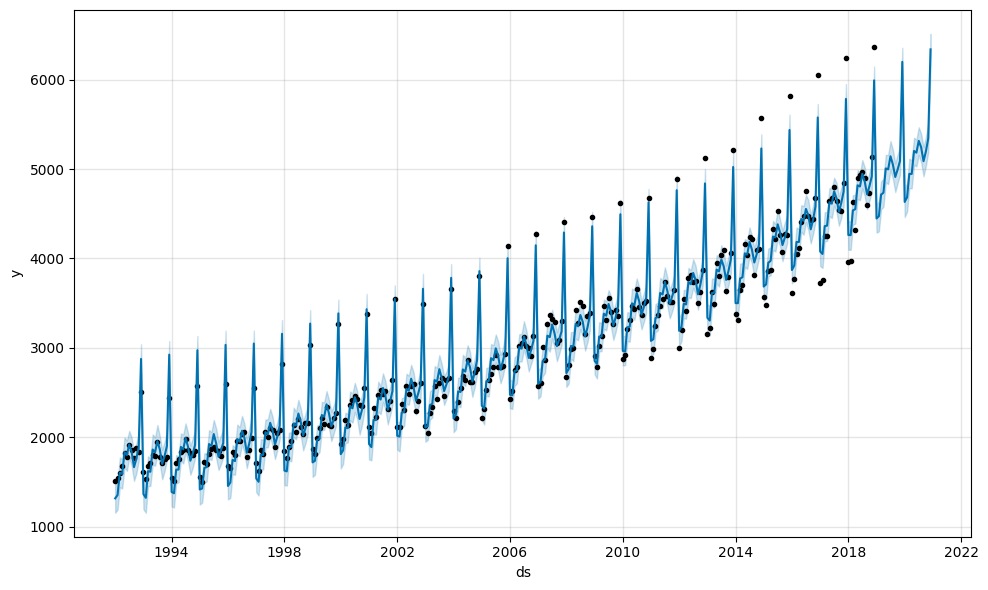

In [37]:
m.plot(forecast);
#despues de datos negros, se muestra el futuro

Para ampliar imagen

In [38]:
pd.plotting.register_matplotlib_converters()

(16071.0, 18993.0)

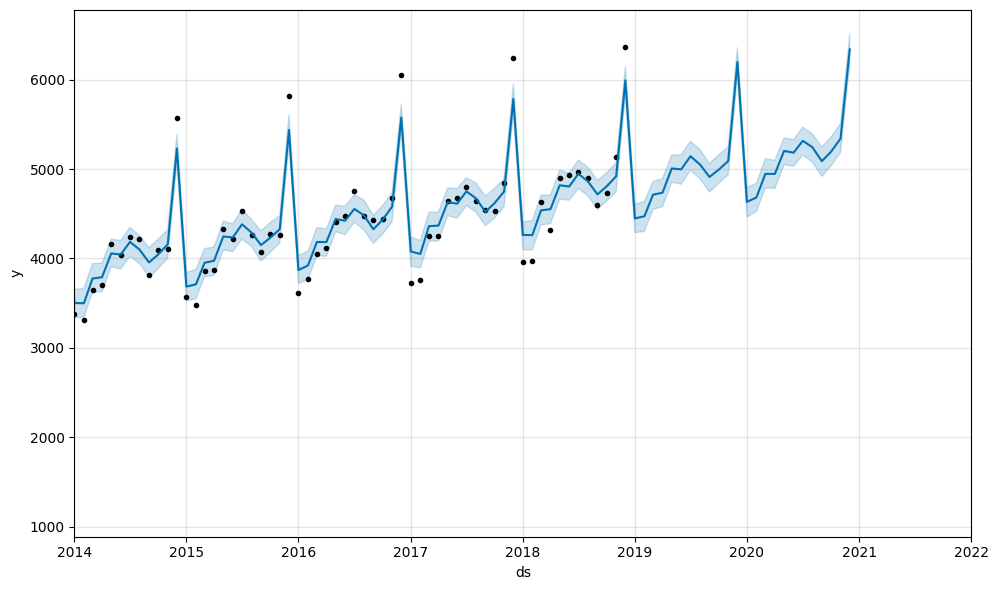

In [39]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01', '2022-01-01')

<Axes: xlabel='ds'>

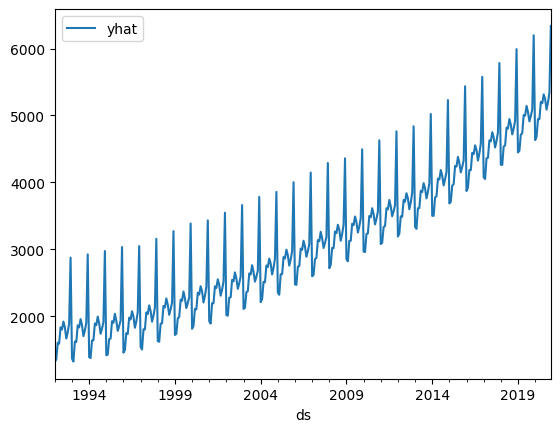

In [40]:
forecast.plot(x='ds', y='yhat')

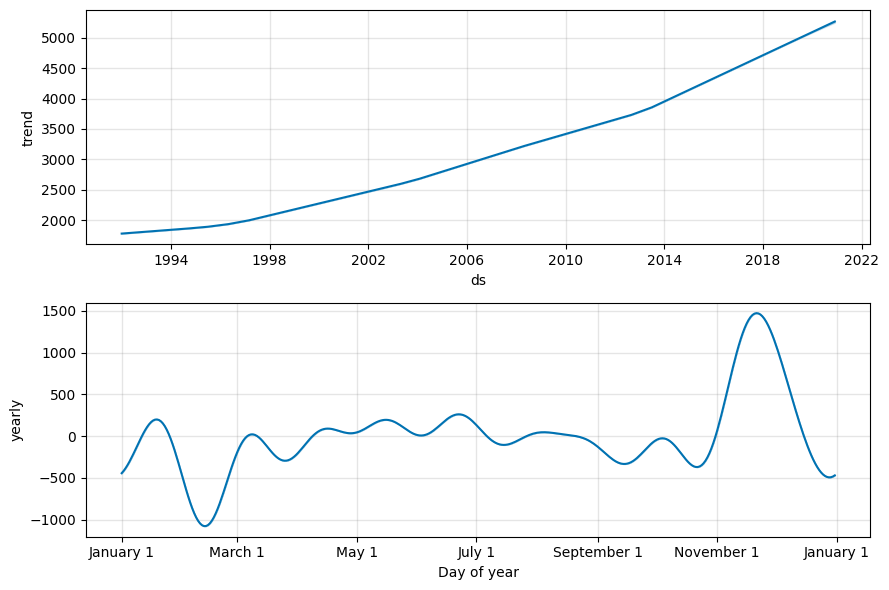

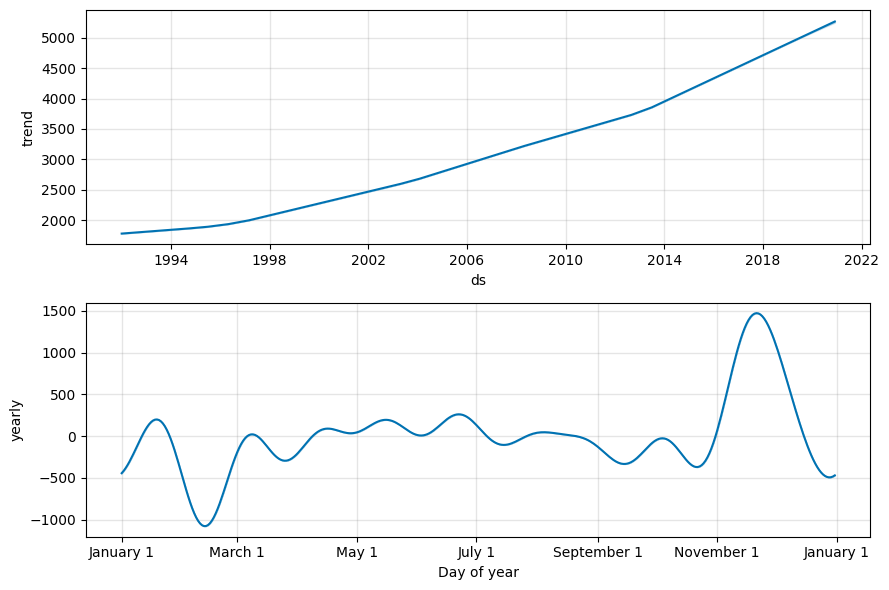

In [41]:
m.plot_components(forecast)
#noviembre diciembre las personas tienden a comprar más alcohol